In [2]:
pip install keras.utils 

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install keras_preprocessing

Retrieving notices: ...working... done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - keras_preprocessing

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-arm64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-arm64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras_preprocessing

Note: you may need to restart the kernel to use updated packages.


In [5]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [6]:
train_path = "images/train"
test_path = "images/test"

In [11]:
def createDataFrame(folder):
    images_path = []
    labels = []
    for label in os.listdir(folder):
        if label != '.DS_Store':  # Skip .DS_Store files
            for image_name in os.listdir(os.path.join(folder, label)):
                images_path.append(os.path.join(folder, label, image_name))
                labels.append(label)
    return images_path, labels

In [12]:
train_df = pd.DataFrame()
train_df['image'], train_df['label'] = createDataFrame(train_path)

In [13]:
train_df.head(5)

,image,label
0,images/train/happy/Training_50449107.jpg,happy
1,images/train/happy/Training_70433018.jpg,happy
2,images/train/happy/Training_85610005.jpg,happy
3,images/train/happy/Training_4460748.jpg,happy
4,images/train/happy/Training_6312930.jpg,happy


In [14]:
print(train_df)

                                            image    label
0        images/train/happy/Training_50449107.jpg    happy
1        images/train/happy/Training_70433018.jpg    happy
2        images/train/happy/Training_85610005.jpg    happy
3         images/train/happy/Training_4460748.jpg    happy
4         images/train/happy/Training_6312930.jpg    happy
...                                           ...      ...
28704  images/train/disgust/Training_94788538.jpg  disgust
28705  images/train/disgust/Training_81049148.jpg  disgust
28706  images/train/disgust/Training_28365203.jpg  disgust
28707  images/train/disgust/Training_39197750.jpg  disgust
28708  images/train/disgust/Training_12525818.jpg  disgust

[28709 rows x 2 columns]


In [15]:
test_df = pd.DataFrame()
test_df['image'], test_df['label'] = createDataFrame(test_path)

In [16]:
test_df.head(5)

,image,label
0,images/test/happy/PrivateTest_45699463.jpg,happy
1,images/test/happy/PrivateTest_61855708.jpg,happy
2,images/test/happy/PublicTest_53681781.jpg,happy
3,images/test/happy/PrivateTest_52109800.jpg,happy
4,images/test/happy/PublicTest_41104919.jpg,happy


In [17]:
print(test_df)

                                             image    label
0       images/test/happy/PrivateTest_45699463.jpg    happy
1       images/test/happy/PrivateTest_61855708.jpg    happy
2        images/test/happy/PublicTest_53681781.jpg    happy
3       images/test/happy/PrivateTest_52109800.jpg    happy
4        images/test/happy/PublicTest_41104919.jpg    happy
...                                            ...      ...
7173  images/test/disgust/PrivateTest_79683471.jpg  disgust
7174  images/test/disgust/PrivateTest_34013087.jpg  disgust
7175   images/test/disgust/PublicTest_67559665.jpg  disgust
7176  images/test/disgust/PrivateTest_89077668.jpg  disgust
7177  images/test/disgust/PrivateTest_53395751.jpg  disgust

[7178 rows x 2 columns]


In [18]:
def extractFeatures(images):
    features = []
    for x in tqdm(images):
        y = load_img(x, grayscale =  True )
        y = np.array(y)
        features.append(y)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [19]:
train_features = extractFeatures(train_df['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

/Users/saisanjanapithani/anaconda3/lib/python3.11/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [20]:
test_features = extractFeatures(test_df['image']) 

  0%|          | 0/7178 [00:00<?, ?it/s]

In [25]:
x_train = train_features/255.0
x_test = test_features/255.0

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_df['label'])

LabelEncoder()

In [27]:
y_train = le.transform(train_df['label'])
y_test = le.transform(test_df['label'])

In [28]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [29]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

/Users/saisanjanapithani/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [30]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [31]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 170s 754ms/step - accuracy: 0.2412 - loss: 1.8374 - val_accuracy: 0.2471 - val_loss: 1.8203
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 177s 788ms/step - accuracy: 0.2553 - loss: 1.8076 - val_accuracy: 0.2562 - val_loss: 1.7770
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 197s 878ms/step - accuracy: 0.2772 - loss: 1.7536 - val_accuracy: 0.3387 - val_loss: 1.6488
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 210s 932ms/step - accuracy: 0.3408 - loss: 1.6559 - val_accuracy: 0.3924 - val_loss: 1.5472
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 213s 949ms/step - accuracy: 0.3940 - loss: 1.5615 - val_accuracy: 0.4517 - val_loss: 1.4116
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 224s 995ms/step - accuracy: 0.4213 - loss: 1.4851 - val_accuracy: 0.4785 - val_loss: 1.3476
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.4514 - loss: 1.4239 - val_accuracy: 0.4990 - val_loss: 1.3102
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.4718

225/225 ━━━━━━━━━━━━━━━━━━━━ 210s 934ms/step - accuracy: 0.7211 - loss: 0.7633 - val_accuracy: 0.6322 - val_loss: 1.0237
Epoch 100/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 215s 954ms/step - accuracy: 0.7238 - loss: 0.7542 - val_accuracy: 0.6339 - val_loss: 1.0283


In [33]:
test_loss_conv2d, test_accuracy_conv2d = model.evaluate(x=x_test, y=y_test)
print("Test Loss:", test_loss_conv2d)c
print("Test Accuracy:", test_accuracy_conv2d)

225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.7154 - loss: 0.8210
Test Loss: 1.0282981395721436
Test Accuracy: 0.6338813304901123


In [35]:
model_json = model.to_json()
with open("emotiondetector_conv2d.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector_conv2d.h5")

In [37]:
from keras.models import model_from_json

In [38]:
json_file = open("emotiondetector_conv2d.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load the model weights into the loaded model
loaded_model.load_weights("emotiondetector_conv2d.h5")

In [39]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [40]:
def feature_Extraction_conv2d(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [41]:
image = 'images/train/sad/Training_120178.jpg'
print("original image is of sad")
img = feature_Extraction_conv2d(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
model prediction is  angry


/Users/saisanjanapithani/anaconda3/lib/python3.11/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
model prediction is  fear


/Users/saisanjanapithani/anaconda3/lib/python3.11/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


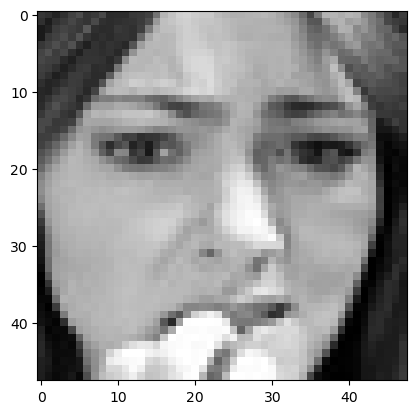

In [43]:
image = 'images/train/fear/Training_303571.jpg'
print("original image is of fear")
img = feature_Extraction_conv2d(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
model prediction is  sad


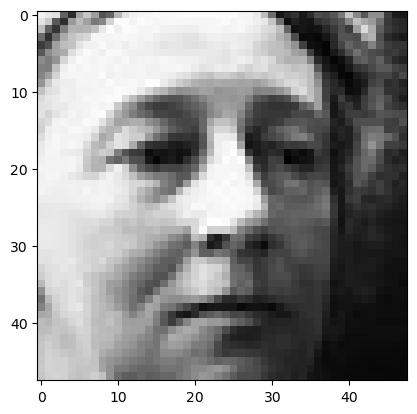

In [44]:
image = 'images/train/sad/Training_2913.jpg'
print("original image is of sad")
img = feature_Extraction_conv2d(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
model prediction is  disgust


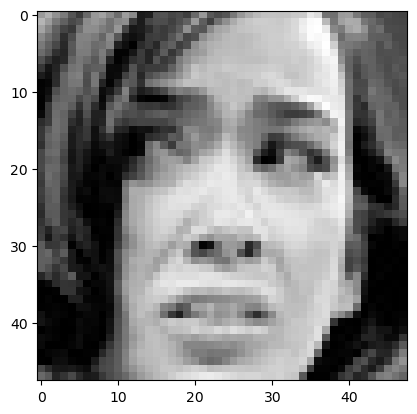

In [45]:
image = 'images/train/disgust/Training_659019.jpg'
print("original image is of disgust")
img = feature_Extraction_conv2d(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
model prediction is  happy


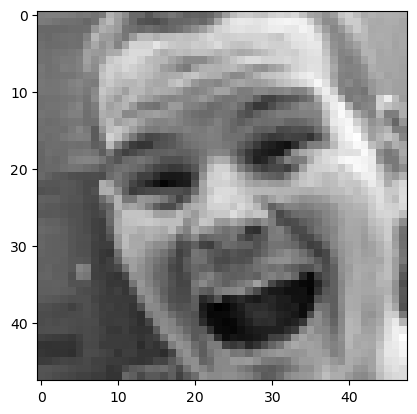

In [46]:
image = 'images/train/happy/Training_11204.jpg'
print("original image is of happy")
img = feature_Extraction_conv2d(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
model prediction is  surprise


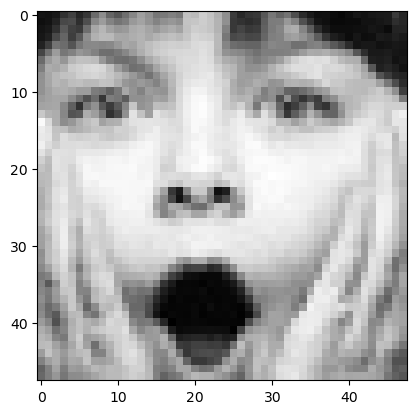

In [47]:
image = 'images/train/surprise/Training_238687.jpg'
print("original image is of surprise")
img = feature_Extraction_conv2d(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
model prediction is  angry


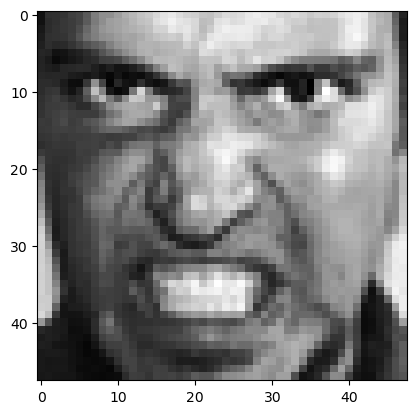

In [48]:
image = 'images/train/angry/Training_992349.jpg'
print("original image is of angry")
img = feature_Extraction_conv2d(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

## vgg16 model

In [97]:
train_df.head(5)

,image,label
0,images/train/happy/Training_50449107.jpg,happy
1,images/train/happy/Training_70433018.jpg,happy
2,images/train/happy/Training_85610005.jpg,happy
3,images/train/happy/Training_4460748.jpg,happy
4,images/train/happy/Training_6312930.jpg,happy


In [98]:
test_df.head(5)

,image,label
0,images/test/happy/PrivateTest_45699463.jpg,happy
1,images/test/happy/PrivateTest_61855708.jpg,happy
2,images/test/happy/PublicTest_53681781.jpg,happy
3,images/test/happy/PrivateTest_52109800.jpg,happy
4,images/test/happy/PublicTest_41104919.jpg,happy


In [99]:
def extractFeatures_vgg16(images):
    features = []
    for x in tqdm(images):
        y = load_img(x, grayscale =  True )
        y = np.array(y)
        features.append(y)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [100]:
train_features_vgg16 = extractFeatures_vgg16(train_df['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

/Users/saisanjanapithani/anaconda3/lib/python3.11/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [101]:
test_features_vgg16 = extractFeatures_vgg16(test_df['image']) 

  0%|          | 0/7178 [00:00<?, ?it/s]

In [102]:
x_train_vgg16 = train_features_vgg16/255.0
x_test_vgg16 = test_features_vgg16/255.0

In [103]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le1.fit(train_df['label'])

LabelEncoder()

In [104]:
y_train_vgg16 = le1.transform(train_df['label'])
y_test_vgg16 = le1.transform(test_df['label'])

In [105]:
y_train_vgg16 = to_categorical(y_train_vgg16,num_classes = 7)
y_test_vgg16 = to_categorical(y_test_vgg16,num_classes = 7)

In [106]:
import cv2
import numpy as np

# Convert grayscale images to RGB
x_train_rgb = np.repeat(x_train_vgg16, 3, axis=-1)
x_test_rgb = np.repeat(x_test_vgg16, 3, axis=-1)

In [109]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical

# Step 1: Load VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Step 2: Modify the model for your classification task
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

model1 = Model(inputs=base_model.input, outputs=predictions)

# Step 3: Compile the model
model1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
model1.fit(x=x_train_rgb, y=y_train_vgg16, batch_size=32, epochs=100, validation_split=0.2)


Epoch 1/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 434s 601ms/step - accuracy: 0.3228 - loss: 1.5751 - val_accuracy: 0.0000e+00 - val_loss: 7.1192
Epoch 2/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 1343s 2s/step - accuracy: 0.3989 - loss: 1.3635 - val_accuracy: 0.0179 - val_loss: 7.4640
Epoch 3/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 520s 724ms/step - accuracy: 0.5192 - loss: 1.1374 - val_accuracy: 0.1167 - val_loss: 8.6713
Epoch 4/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 2081s 3s/step - accuracy: 0.5616 - loss: 1.0217 - val_accuracy: 0.0017 - val_loss: 9.2787
Epoch 5/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 440s 613ms/step - accuracy: 0.5934 - loss: 0.9621 - val_accuracy: 0.0310 - val_loss: 9.9862
Epoch 6/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 479s 667ms/step - accuracy: 0.6346 - loss: 0.8750 - val_accuracy: 0.1430 - val_loss: 9.2910
Epoch 7/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 1149s 2s/step - accuracy: 0.6579 - loss: 0.8395 - val_accuracy: 0.1085 - val_loss: 10.5652
Epoch 8/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 484s 674ms/step - accuracy: 0

KeyboardInterrupt: 

In [110]:
test_loss_vgg16, test_accuracy_vgg16 = model1.evaluate(x=x_test_rgb, y=y_test_vgg16)
print("Test Loss:", test_loss_vgg16)
print("Test Accuracy:", test_accuracy_vgg16)

225/225 ━━━━━━━━━━━━━━━━━━━━ 30s 131ms/step - accuracy: 0.7122 - loss: 1.7189
Test Loss: 6.859984874725342
Test Accuracy: 0.5466703772544861


In [151]:
model_json = model1.to_json()
with open("emotiondetector_vgg16.json",'w') as json_file:
    json_file.write(model_json)
model1.save("emotiondetector_vgg16.h5")

In [152]:
from keras.models import model_from_json

In [153]:
json_file2 = open("emotiondetector_vgg16.json", "r")
loaded_model_json2 = json_file2.read()
json_file2.close()
loaded_model2 = model_from_json(loaded_model_json2)

# Load the model weights into the loaded model
loaded_model2.load_weights("emotiondetector_vgg16.h5")

In [154]:
def feature_Extraction_vgg16(image_path):
    img = load_img(image_path, color_mode='rgb', target_size=(48, 48))
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 3)  # Reshape to (1, height, width, 3)
    return feature / 255.0

In [155]:
image = 'images/train/sad/Training_120178.jpg'
print("original image is of sad")
img = feature_Extraction_vgg16(image)
pred = model1.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
model prediction is  sad


In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
model prediction is  fear


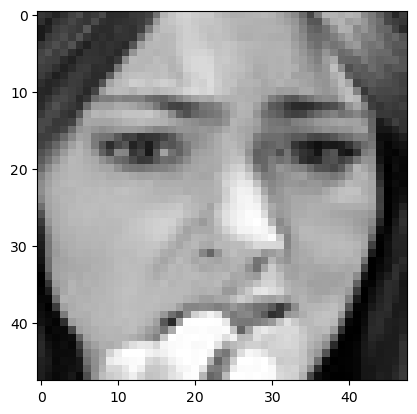

In [157]:
image = 'images/train/fear/Training_303571.jpg'
print("original image is of fear")
img = feature_Extraction_vgg16(image)
pred = model1.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48,3),cmap='gray')

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
model prediction is  sad


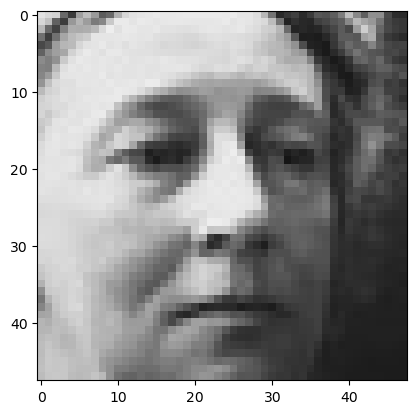

In [158]:
image = 'images/train/sad/Training_2913.jpg'
print("original image is of sad")
img = feature_Extraction_vgg16(image)
pred = model1.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48,3),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
model prediction is  sad


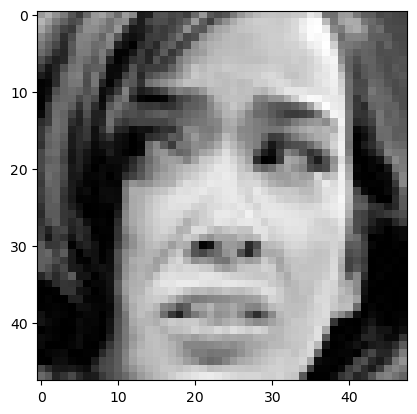

In [159]:
image = 'images/train/disgust/Training_659019.jpg'
print("original image is of disgust")
img = feature_Extraction_vgg16(image)
pred = model1.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48,3),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
model prediction is  happy


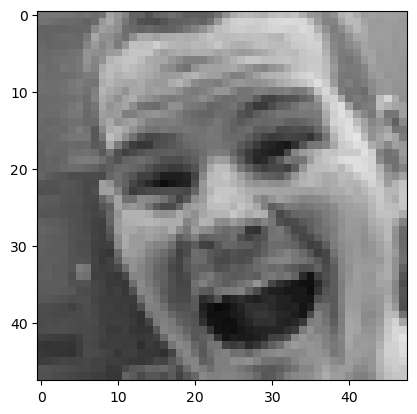

In [160]:
image = 'images/train/happy/Training_11204.jpg'
print("original image is of happy")
img = feature_Extraction_vgg16(image)
pred = model1.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48,3),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
model prediction is  surprise


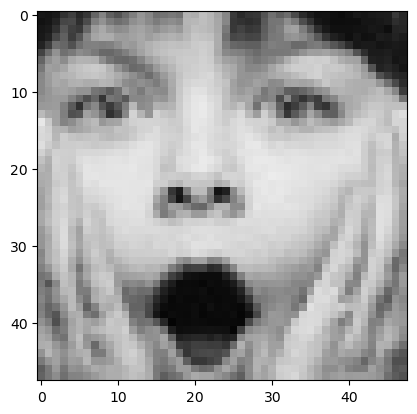

In [161]:
image = 'images/train/surprise/Training_238687.jpg'
print("original image is of surprise")
img = feature_Extraction_vgg16(image)
pred = model1.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48,3),cmap='gray')

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
model prediction is  fear


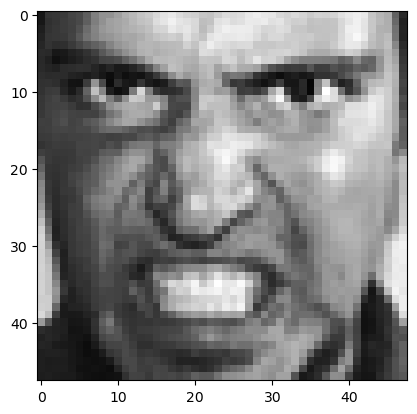

In [162]:
image = 'images/train/angry/Training_992349.jpg'
print("original image is of angry")
img = feature_Extraction_vgg16(image)
pred = model1.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48,3),cmap='gray')

## DCNN

In [112]:
print("Shape train_df:", train_df.shape)
print("Shape test_df:", test_df.shape)

Shape train_df: (28709, 2)
Shape test_df: (7178, 2)


In [116]:
print("Shape train data:", train_features.shape)
print("Shape test data:", test_features.shape)

Shape train data: (28709, 48, 48, 1)
Shape test data: (7178, 48, 48, 1)


In [132]:
x_train_dcnn = train_features/255
x_test_dcnn = test_features/255
print("X train shape:", x_train_dcnn.shape)
print("X test shape:", x_test_dcnn.shape)

X train shape: (28709, 48, 48, 1)
X test shape: (7178, 48, 48, 1)


In [119]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
le2.fit(train_df['label'])

LabelEncoder()

In [120]:
y_train_dcnn = le2.transform(train_df['label'])
y_test_dcnn = le2.transform(test_df['label'])
print("Y train shape:", y_train_dcnn.shape)
print("Y test shape:", y_test_dcnn.shape)

Y train shape: (28709,)
Y test shape: (7178,)


In [121]:
y_train_dcnn = to_categorical(y_train_dcnn,num_classes = 7)
y_test_dcnn = to_categorical(y_test_dcnn,num_classes = 7)
print("Y train shape:", y_train_dcnn.shape)
print("Y test shape:", y_test_dcnn.shape)

Y train shape: (28709, 7)
Y test shape: (7178, 7)


In [138]:
img_width = x_train_dcnn.shape[1]
img_height = x_train_dcnn.shape[2]
img_depth = x_train_dcnn.shape[3]
num_classes1 = y_train_dcnn.shape[1]

print(img_width)
print(img_height)
print(img_depth)
print(num_classes1)

48
48
1
7


In [133]:
def build_net(optim):
    net = Sequential(name='DCNN')

    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(img_width, img_height, img_depth),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_1'))
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_2'
        )
    )
    net.add(BatchNormalization(name='batchnorm_2'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
    net.add(Dropout(0.4, name='dropout_1'))

    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_3'
        )
    )
    net.add(BatchNormalization(name='batchnorm_3'))
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_4'
        )
    )
    net.add(BatchNormalization(name='batchnorm_4'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
    net.add(Dropout(0.4, name='dropout_2'))

    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_5'
        )
    )
    net.add(BatchNormalization(name='batchnorm_5'))
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_6'
        )
    )
    net.add(BatchNormalization(name='batchnorm_6'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    net.add(Dropout(0.5, name='dropout_3'))

    net.add(Flatten(name='flatten'))
        
    net.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal',
            name='dense_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_7'))
    
    net.add(Dropout(0.6, name='dropout_4'))
    
    net.add(
        Dense(
            num_classes,
            activation='softmax',
            name='out_layer'
        )
    )
    
    net.compile(
        loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )
    
    net.summary()
    
    return net

In [134]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [135]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(x_train_dcnn)

In [150]:
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras import optimizers
batch_size = 32 #batch size of 32 performs the best.
epochs = 100
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]
model3 = build_net(optims[1]) 
history = model3.fit(
    train_datagen.flow(x_train_dcnn, y_train_dcnn, batch_size=batch_size),
    validation_data=(x_test_dcnn, y_test_dcnn),
    steps_per_epoch=len(x_train_dcnn) // batch_size,
    epochs=epochs,
    callbacks=callbacks
)

# history = model3.fit_generator(
#     train_datagen.flow(x_train_dcnn, y_train_dcnn, batch_size=batch_size),
#     validation_data=(x_test_dcnn, y_test_dcnn),
#     steps_per_epoch=len(x_train_dcnn) / batch_size,
#     epochs=epochs,
#     callbacks=callbacks,
#     use_multiprocessing=True
# )

# history = model3.fit(
#     train_datagen.flow(x_train_dcnn, y_train_dcnn, batch_size=batch_size),
#     validation_data=(x_test_dcnn, y_test_dcnn),
#     steps_per_epoch=len(x_train_dcnn) // batch_size,  # Use integer division (//) here
#     epochs=epochs,
#     callbacks=callbacks,
#     use_multiprocessing=True
# )


Model: "DCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_1                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_2                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_1 (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_3                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_4                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_2 (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_5                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_6                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_3 (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_7                     │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,395,591 (9.14 MB)

 Trainable params: 2,393,543 (9.13 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 454s 504ms/step - accuracy: 0.2094 - loss: 2.3507 - val_accuracy: 0.3239 - val_loss: 1.6923 - learning_rate: 0.0010
Epoch 2/100
  1/897 ━━━━━━━━━━━━━━━━━━━━ 7:29 502ms/step - accuracy: 0.2812 - loss: 1.8189

2024-04-23 00:05:09.168280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.2812 - loss: 1.8189 - val_accuracy: 0.3232 - val_loss: 1.6931 - learning_rate: 0.0010
Epoch 3/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 707s 789ms/step - accuracy: 0.3061 - loss: 1.7366 - val_accuracy: 0.3963 - val_loss: 1.5559 - learning_rate: 0.0010
Epoch 4/100
  1/897 ━━━━━━━━━━━━━━━━━━━━ 5:57 399ms/step - accuracy: 0.3750 - loss: 1.8208

2024-04-23 00:17:28.126317: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.3750 - loss: 1.8208 - val_accuracy: 0.4097 - val_loss: 1.5226 - learning_rate: 0.0010
Epoch 5/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 23970s 27s/step - accuracy: 0.3801 - loss: 1.5824 - val_accuracy: 0.4586 - val_loss: 1.4179 - learning_rate: 0.0010
Epoch 6/100
  1/897 ━━━━━━━━━━━━━━━━━━━━ 5:52 393ms/step - accuracy: 0.5000 - loss: 1.3483

2024-04-23 06:57:24.056307: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 2098s 2s/step - accuracy: 0.5000 - loss: 1.3483 - val_accuracy: 0.4581 - val_loss: 1.4161 - learning_rate: 0.0010
Epoch 7/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 4785s 5s/step - accuracy: 0.4431 - loss: 1.4535 - val_accuracy: 0.5146 - val_loss: 1.2743 - learning_rate: 0.0010
Epoch 8/100
  1/897 ━━━━━━━━━━━━━━━━━━━━ 6:09 412ms/step - accuracy: 0.4375 - loss: 1.4094

2024-04-23 08:52:06.540008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.4375 - loss: 1.4094 - val_accuracy: 0.5176 - val_loss: 1.2723 - learning_rate: 0.0010
Epoch 9/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 757s 844ms/step - accuracy: 0.4769 - loss: 1.3852 - val_accuracy: 0.5400 - val_loss: 1.2099 - learning_rate: 0.0010
Epoch 10/100
  1/897 ━━━━━━━━━━━━━━━━━━━━ 6:23 428ms/step - accuracy: 0.5312 - loss: 1.3434

2024-04-23 09:05:09.287944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.5312 - loss: 1.3434 - val_accuracy: 0.5373 - val_loss: 1.2141 - learning_rate: 0.0010
Epoch 11/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 437s 487ms/step - accuracy: 0.5017 - loss: 1.3203 - val_accuracy: 0.5316 - val_loss: 1.2360 - learning_rate: 0.0010
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.


In [163]:
model_json = model3.to_json()
with open("emotiondetector_dcnn.json",'w') as json_file:
    json_file.write(model_json)
model3.save("emotiondetector_dcnn.h5")

In [164]:
test_loss_dcnn, test_accuracy_dcnn = model3.evaluate(x=x_test_dcnn, y=y_test_dcnn)
print("Test Loss:", test_loss_dcnn)
print("Test Accuracy:", test_accuracy_dcnn)

225/225 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.4954 - loss: 1.4633
Test Loss: 1.6923471689224243
Test Accuracy: 0.32390639185905457


In [167]:
from keras.models import model_from_json

In [169]:
json_file = open("emotiondetector_dcnn.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load the model weights into the loaded model
loaded_model.load_weights("emotiondetector_dcnn.h5")

In [168]:
def feature_Extraction_dcnn(image_path):
    img = load_img(image_path, color_mode='rgb', target_size=(48, 48))
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 3)  # Reshape to (1, height, width, 3)
    return feature / 255.0

In [175]:
# image = 'images/train/sad/Training_120178.jpg'
# print("original image is of sad")
# img = feature_Extraction_dcnn(image)
# pred = model3.predict(img)
# pred_label = label[pred.argmax()]
# print("model prediction is ",pred_label)

import cv2
import numpy as np

# Load the image and convert it to grayscale
image = cv2.imread("images/train/sad/Training_120178.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the image to match the input size of the model
resized_image = cv2.resize(gray_image, (48, 48))

# Expand the dimensions to match the expected input shape (add a batch dimension)
img = np.expand_dims(resized_image, axis=0)
img = np.expand_dims(img, axis=-1)  # Add a channel dimension

# Perform feature extraction
pred = model3.predict(img)
print("original image is of sad")
# Assuming 'label' is a list of class labels
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
original image is of sad
model prediction is neutral


In [165]:
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras import optimizers

# Define batch size and epochs
batch_size = 32
epochs = 100

# Define optimizer
optimizer = optimizers.Adam(learning_rate=0.001)

# Build the model (replace this with your own build_net function)
model4 = build_net(optimizer) 

# Train the model
history = model4.fit(
    train_datagen.flow(x_train_dcnn, y_train_dcnn, batch_size=batch_size),
    validation_data=(x_test_dcnn, y_test_dcnn),
    steps_per_epoch=len(x_train_dcnn) // batch_size,
    epochs=epochs,
    callbacks=callbacks
)


Model: "DCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_1                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_2                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_1 (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_3                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_4                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_2 (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_5                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_6                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_3 (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_7                     │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,395,591 (9.14 MB)

 Trainable params: 2,393,543 (9.13 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 400s 445ms/step - accuracy: 0.2079 - loss: 2.3810 - val_accuracy: 0.3416 - val_loss: 1.6612 - learning_rate: 0.0010
Epoch 2/100
  1/897 ━━━━━━━━━━━━━━━━━━━━ 6:37 444ms/step - accuracy: 0.3125 - loss: 1.7850

2024-04-23 09:39:04.557820: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.3125 - loss: 1.7850 - val_accuracy: 0.3468 - val_loss: 1.6537 - learning_rate: 0.0010
Epoch 3/100
 90/897 ━━━━━━━━━━━━━━━━━━━━ 6:16 467ms/step - accuracy: 0.2905 - loss: 1.7813

KeyboardInterrupt: 

In [166]:
test_loss_dcnn1, test_accuracy_dcnn1 = model4.evaluate(x=x_test_dcnn, y=y_test_dcnn)
print("Test Loss:", test_loss_dcnn1)
print("Test Accuracy:", test_accuracy_dcnn1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.5946 - loss: 1.3040
Test Loss: 1.6211869716644287
Test Accuracy: 0.3526051938533783
